### Causal identification in DAGs using Backdoor and Swigs, Equivalence Classes, Falsiability Tests



In [136]:
#import Pkg; Pkg.add("StructuralCausalModels")
#import Pkg; Pkg.add("TikzGraphs")
#import Pkg; Pkg.add("TikzPictures")
#import Pkg; Pkg.add("GraphViz")
#import Pkg; Pkg.add("Dagitty")
#import Pkg; Pkg.add("GraphPlot")

#using StructuralCausalModels
#using TikzGraphs
#using TikzPictures
#using Dagitty, Test 
#using LightGraphs, GraphPlot

In [1]:
using StructuralCausalModels
using GraphRecipes, Plots


(process:23976): GLib-GIO-WARNING **: 23:44:49.789: Unexpectedly, UWP app `Evernote.Evernote_10.32.4.0_x86__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs


In [2]:
ProjDir = @__DIR__
cd(ProjDir) #do

d_string = "dag {A -> {E Z}; B -> {D Z}; Z -> {D E}; E -> D}"

dag = DAG("conf_triangles", d_string);

show(dag)

to_ggm(dag) |> display

OrderedDict{Union{Symbol, Vector{Symbol}}, Union{Symbol, Vector{Symbol}}} with 4 entries:
  :D       => :E
  [:D, :E] => :Z
  [:D, :Z] => :B
  [:E, :Z] => :A

"DAG(D ~ E, D ~ Z, E ~ Z, D ~ B, Z ~ B, E ~ A, Z ~ A)"


DAG object:

name = "conf_triangles"
vars = [:D, :E, :Z, :B, :A]




In [223]:
dag.vars[5]

#StructuralCausalModels.edge_matrix(d_string)

:A

### Graph Generation and Plotting

The following DAG is due to Judea Pearl

In [33]:
G = "dag {Z1 -> {X1}; X1 -> {D}; Z1 -> {X2}; Z2 -> X3; X3 -> {Y}; Z2 -> {X2}; D -> {Y}
                ; X2 -> {Y}; X2 -> {D}; M -> {Y}; D -> {M}}"

G = DAG("Model_1", G);

to_ggm(G) |> display

show(G) # Variable's location in an array 

"DAG(M ~ D, Y ~ M + X2 + D + X3, D ~ X2 + X1, X2 ~ Z2 + Z1, X3 ~ Z2, X1 ~ Z1)"

OrderedDict{Union{Symbol, Vector{Symbol}}, Union{Symbol, Vector{Symbol}}} with 6 entries:
  [:M]  => :D
  [:Y]  => [:M, :X2, :D, :X3]
  [:D]  => [:X2, :X1]
  [:X2] => [:Z2, :Z1]
  :X3   => :Z2
  [:X1] => :Z1


DAG object:

name = "Model_1"
vars = [:M, :D, :Y, :X2, :X3, :X1, :Z2, :Z1]




In [39]:
# variables's name into two arrays

names(G.e)

2-element Vector{Vector{Symbol}}:
 [:M, :D, :Y, :X2, :X3, :X1, :Z2, :Z1]
 [:M, :D, :Y, :X2, :X3, :X1, :Z2, :Z1]

In [28]:
# DAG to matrix
G.e

# colums : affected varaible 
# rows : covariables 

8×8 Named Matrix{Int64}
Rows ╲ Cols │  :M   :D   :Y  :X2  :X3  :X1  :Z2  :Z1
────────────┼───────────────────────────────────────
:M          │   0    0    1    0    0    0    0    0
:D          │   1    0    1    0    0    0    0    0
:Y          │   0    0    0    0    0    0    0    0
:X2         │   0    1    1    0    0    0    0    0
:X3         │   0    0    1    0    0    0    0    0
:X1         │   0    1    0    0    0    0    0    0
:Z2         │   0    0    0    1    1    0    0    0
:Z1         │   0    0    0    1    0    1    0    0

┌ Warning: Keyword argument letter not supported with Plots.GRBackend().  Choose from: Set([:top_margin, :group, :inset_subplots, :background_color, :ytickfontsize, :yforeground_color_text, :yguidefontcolor, :tickfontfamily, :show_empty_bins, :seriesalpha, :seriescolor, :ztick_direction, :xgrid, :ygridalpha, :zlims, :xtick_direction, :colorbar, :legend_font_family, :zflip, :ticks, :linealpha, :overwrite_figure, :arrow, :xguidefonthalign, :normalize, :linestyle, :xtickfontvalign, :xflip, :zgrid, :fillcolor, :ygrid, :bar_width, :colorbar_scale, :background_color_inside, :zguidefonthalign, :bins, :zguide, :zforeground_color_text, :legend_font_valign, :yscale, :legend_font_color, :weights, :xgridalpha, :ygridstyle, :clims, :xtickfontcolor, :fill_z, :xguide, :markershape, :background_color_subplot, :ztickfontfamily, :fillalpha, :markerstrokewidth, :tick_direction, :xguidefontvalign, :xguidefontfamily, :gridlinewidth, :foreground_color_subplot, :xgridlinewidth, :yguidefontsize, :foreground_c

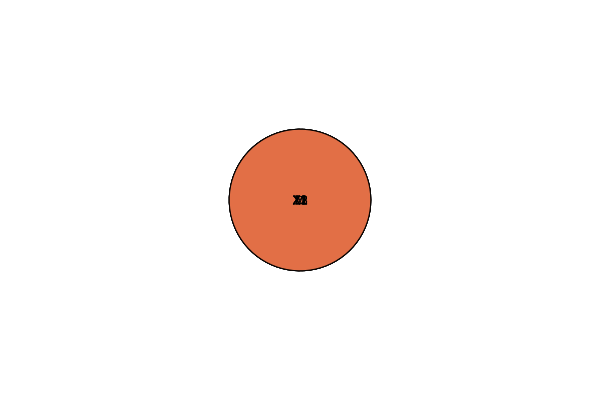

In [40]:
# First: all varibles in (0,0) coordinates

graphplot(G.e, names=names(G.e, 1), curvature_scalar=0, nodesize=0.2,
  method=:spring, fontsize=8, arrow=1, nodeshape=:circle, nodecolor = 2, dim = 2, x = [0,0,0,0,0,0,0,0], y = [0,0,0,0,0,0,0,0])

# curvature_scalar: size point
# arrow : arrow size
# fontsize: circle's size
# (x, y) location 

In [41]:
names(G.e,1)

8-element Vector{Symbol}:
 :M
 :D
 :Y
 :X2
 :X3
 :X1
 :Z2
 :Z1

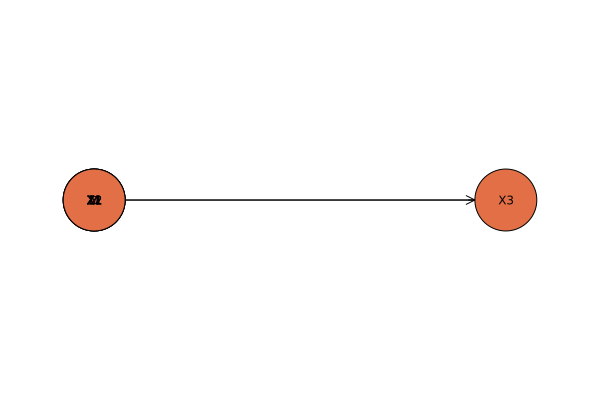

In [42]:
# X3 in (1,0) coordinates
graphplot(G.e, names=names(G.e, 1), curvature_scalar=0, nodesize=0.2,
  method=:spring, fontsize=8, arrow=1, nodeshape=:circle, nodecolor = 2, dim = 2, x = [0,0,0,0,1,0,0,0], y = [0,0,0,0,0,0,0,0])


In [43]:
names(G.e,1)

8-element Vector{Symbol}:
 :M
 :D
 :Y
 :X2
 :X3
 :X1
 :Z2
 :Z1

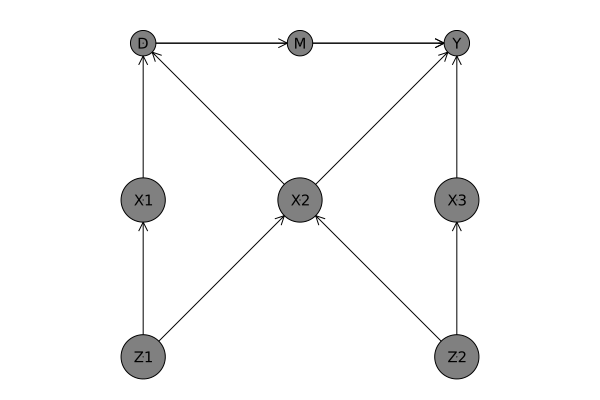

In [144]:
# more details
# edgecolor: arrow's color
# axis_buffer: graph's size

graphplot(G.e, names=names(G.e, 1), curvature_scalar=0, nodesize=0.3,
      method=:spring, fontsize=10, arrow=0.2, nodeshape=:circle, nodecolor = :gray,axis_buffer = 0.1
        ,edgecolor = :black, x = [0,-1,1,0,1,-1,1,-1], y = [1,1,1,0,0,0,-1,-1], nodestrokecolor = :black)


### Find Paths Between D and Y

In [146]:
pths = all_paths(G, :D, :Y)
#pths |> display

5-element Vector{Vector{Symbol}}:
 [:D, :M, :Y]
 [:D, :X1, :Z1, :X2, :Y]
 [:D, :X1, :Z1, :X2, :Z2, :X3, :Y]
 [:D, :X2, :Y]
 [:D, :X2, :Z2, :X3, :Y]

### List All Testable Implications of the Model¶

In [205]:
CInd = basis_set(G)
display(CInd)

BasisSet[
  :D ∐ :X3 | [:Z2]
  :D ∐ :X3 | [:X2, :X1]
  :D ∐ :X3 | [:X2, :Z2]
  :D ∐ :X3 | [:X1, :Z2]
  :D ∐ :X3 | [:X2, :X1, :Z2]
  :D ∐ :Z2 | [:X2, :X1]
  :D ∐ :Z1 | [:X2, :X1]
  :M ∐ :X2 | [:D]
  :M ∐ :X2 | [:Z2, :D]
  :M ∐ :X2 | [:Z1, :D]
  :M ∐ :X2 | [:Z2, :Z1, :D]
  :M ∐ :X3 | [:D]
  :M ∐ :X3 | [:Z2]
  :M ∐ :X3 | [:D, :Z2]
  :M ∐ :X1 | [:D]
  :M ∐ :X1 | [:Z1, :D]
  :M ∐ :Z2 | [:D]
  :M ∐ :Z1 | [:D]
  :X1 ∐ :Z2
  :X1 ∐ :Z2 | [:Z1]
  :X2 ∐ :X3 | [:Z2]
  :X2 ∐ :X3 | [:Z2, :Z1]
  :X2 ∐ :X1 | [:Z1]
  :X2 ∐ :X1 | [:Z2, :Z1]
  :X3 ∐ :X1
  :X3 ∐ :X1 | [:Z1]
  :X3 ∐ :X1 | [:Z2]
  :X3 ∐ :X1 | [:Z1, :Z2]
  :X3 ∐ :Z1
  :X3 ∐ :Z1 | [:Z2]
  :Y ∐ :X1 | [:Z1, :X2, :D]
  :Y ∐ :X1 | [:X2, :D, :X3]
  :Y ∐ :X1 | [:Z1, :X2, :D, :M]
  :Y ∐ :X1 | [:Z1, :X2, :D, :X3]
  :Y ∐ :X1 | [:X2, :D, :M, :X3]
  :Y ∐ :X1 | [:Z1, :X2, :D, :M, :X3]
  :Y ∐ :Z2 | [:X2, :D, :X3]
  :Y ∐ :Z2 | [:X2, :D, :M, :X3]
  :Y ∐ :Z1 | [:X2, :D, :X3]
  :Y ∐ :Z1 | [:X2, :D, :M, :X3]
  :Z2 ∐ :Z1
]


### Identification by Backdoor: List minimal adjustment sets to identify causal effects 

$$ D \rightarrow Y$$

In [207]:
bp = backdoor_paths(G, pths, :D)

4-element Vector{Vector{Symbol}}:
 [:D, :X1, :Z1, :X2, :Y]
 [:D, :X1, :Z1, :X2, :Z2, :X3, :Y]
 [:D, :X2, :Y]
 [:D, :X2, :Z2, :X3, :Y]

In [158]:
e = d_separation(G, :D, :Y)
println("d_separation($(G.name), D, Y) = $e\n")

d_separation(Model_1, D, Y) = false



### Identification via SWIG and D-separation

In [159]:
SWIG = "dag {Z1 -> {X1}; X1 -> {D}; Z1 -> {X2}; Z2 -> X3; X3 -> {Yd}; Z2 -> {X2}; X2 -> {Yd} 
        ; X2 -> {D}; Md -> {Yd}; d -> {Md}}"

SWIG = DAG("Model_2", SWIG)

OrderedDict{Union{Symbol, Vector{Symbol}}, Union{Symbol, Vector{Symbol}}} with 6 entries:
  [:Md] => :d
  [:Yd] => [:Md, :X2, :X3]
  [:D]  => [:X2, :X1]
  [:X2] => [:Z2, :Z1]
  :X3   => :Z2
  [:X1] => :Z1

name = "Model_2"
vars = [:Md, :d, :Yd, :X2, :X3, :D, :X1, :Z2, :Z1]



DAG object:





In [160]:
names(SWIG.e,1)

9-element Vector{Symbol}:
 :Md
 :d
 :Yd
 :X2
 :X3
 :D
 :X1
 :Z2
 :Z1

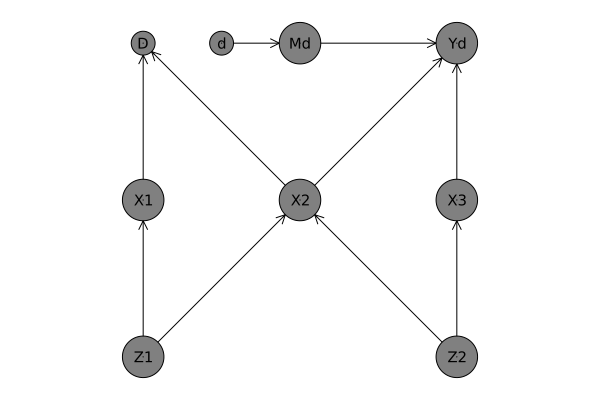

In [166]:
graphplot(SWIG.e, names=names(SWIG.e, 1), curvature_scalar=0, nodesize=0.3,
      method=:spring, fontsize=10, arrow=0.2, nodeshape=:circle, nodecolor = :gray,axis_buffer = 0.1
        ,edgecolor = :black, x = [0,-0.5,1,0,1,-1,-1,1,-1], y = [1,1,1,0,0,1,0,-1,-1], nodestrokecolor = :black)


In [196]:
#Deduce Conditional Exogeneity or Ignorability by D-separation

CInd = basis_set(SWIG)
#length(CInd)

BasisSet[
  :D ∐ :Z2 | [:X2, :X1]
  :D ∐ :Z1 | [:X2, :X1]
  :Md ∐ :X2
  :Md ∐ :X2 | [:d]
  :Md ∐ :X2 | [:Z2]
  :Md ∐ :X2 | [:Z1]
  :Md ∐ :X2 | [:d, :Z2]
  :Md ∐ :X2 | [:d, :Z1]
  :Md ∐ :X2 | [:Z2, :Z1]
  :Md ∐ :X2 | [:d, :Z2, :Z1]
  :Md ∐ :X3
  :Md ∐ :X3 | [:d]
  :Md ∐ :X3 | [:Z2]
  :Md ∐ :X3 | [:d, :Z2]
  :Md ∐ :D
  :Md ∐ :D | [:d]
  :Md ∐ :D | [:X2]
  :Md ∐ :D | [:X1]
  :Md ∐ :D | [:d, :X2]
  :Md ∐ :D | [:d, :X1]
  :Md ∐ :D | [:X2, :X1]
  :Md ∐ :D | [:d, :X2, :X1]
  :Md ∐ :X1
  :Md ∐ :X1 | [:d]
  :Md ∐ :X1 | [:Z1]
  :Md ∐ :X1 | [:d, :Z1]
  :Md ∐ :Z2
  :Md ∐ :Z2 | [:d]
  :Md ∐ :Z1
  :Md ∐ :Z1 | [:d]
  :X1 ∐ :Z2
  :X1 ∐ :Z2 | [:Z1]
  :X2 ∐ :X3 | [:Z2]
  :X2 ∐ :X3 | [:Z2, :Z1]
  :X2 ∐ :X1 | [:Z1]
  :X2 ∐ :X1 | [:Z2, :Z1]
  :X3 ∐ :D | [:Z2]
  :X3 ∐ :D | [:Z2, :X2]
  :X3 ∐ :D | [:Z2, :X1]
  :X3 ∐ :D | [:X2, :X1]
  :X3 ∐ :D | [:Z2, :X2, :X1]
  :X3 ∐ :X1
  :X3 ∐ :X1 | [:Z2]
  :X3 ∐ :X1 | [:Z1]
  :X3 ∐ :X1 | [:Z2, :Z1]
  :X3 ∐ :Z1
  :X3 ∐ :Z1 | [:Z2]
  :Yd ∐ :D | [:X2, :X3]
  :Yd ∐ :D | [:X2

In [243]:
size(names(G.e,1))[1]

8

In [251]:
a = size(names(G.e,1))[1]

for i in 1:8
    b = names(G.e,1)[i]
end

### Print All Average Effects Identifiable by Conditioning

In [226]:
for i in 1:8
    n = names(G.e,1)[i]
    for j in 1:size(children(G,n))[1]   
        m = children(G,n)[j]
        a = backdoor_paths(G, all_paths(G, :n, :m), :n)
        if lenght(a) > 0
            println("The effect: $n -> $m is identifiable by controlling for:\n", a)
            
        end
    end
end

LoadError: UndefVarError: children not defined

### Next Consider the elemntary Triangular Model:

$$ D \rightarrow Y, X \rightarrow (D,Y) $$

In [197]:
G3 = "dag {D -> {Y}; X -> {D}; X -> {Y}}"

G3 = DAG("Model_3", G3)

OrderedDict{Union{Symbol, Vector{Symbol}}, Union{Symbol, Vector{Symbol}}} with 2 entries:
  [:Y] => [:X, :D]
  [:D] => :X

name = "Model_3"
vars = [:Y, :X, :D]



DAG object:





In [198]:
names(G3.e,1)

3-element Vector{Symbol}:
 :Y
 :X
 :D

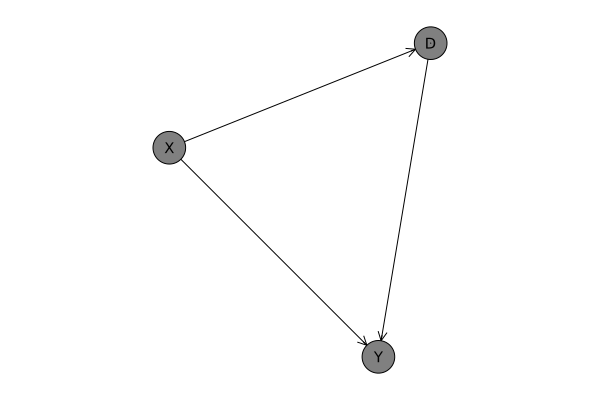

In [202]:
graphplot(G3.e, names=names(G3.e, 1), curvature_scalar=0, nodesize=0.3,
      method=:spring, fontsize=10, arrow=0.2, nodeshape=:circle, nodecolor = :gray,axis_buffer = 0.1
        ,edgecolor = :black, x = [0,-2,0.5], y = [-1,1,2], nodestrokecolor = :black)


In [203]:
#Conditional Independencies
CInd = basis_set(G3) # nothing


BasisSet[
]


In [216]:
bp1 = backdoor_paths(G3, all_paths(G3, :D, :Y), :D) # controling X (confounder varaible)

1-element Vector{Vector{Symbol}}:
 [:D, :X, :Y]

### Example of Testing DAG Validity

In [31]:
G = Dagitty.DAG(:Z1 => :X1, :X1 => :D, :Z1 => :X2, :Z2 => :X3, :X3 => :Y, :Z2 => :X2, :D => :Y,
    :X2 => :Y, :X2 => :D, :M => :Y, :D => :M)
#drawdag(plant_dag, [0, 0, 0, 0,0,0,0,1], [0, 0, 0, 0,0,0,0,0])

# 8 variables & 11 relationships 
# Getting varaibles' ubication into a vector

DAG: {8, 11} directed simple Int64 graph with labels [:D, :M, :X1, :X2, :X3, :Y, :Z1, :Z2])


In [37]:
node(G,labels)

LoadError: UndefVarError: labels not defined

In [133]:
Path(G, :D, :Y)

LoadError: MethodError: no method matching Path(::Dagitty.DAG, ::Symbol, ::Symbol)
[0mClosest candidates are:
[0m  Path(::Any, ::Any, ::Any, [91m::Any[39m, [91m::Any[39m, [91m::Any[39m) at C:\Users\Roberto Carlos\.julia\packages\StructuralCausalModels\m90sE\src\types\Path.jl:4
[0m  Path([91m::NamedArray[39m, ::Symbol, ::Symbol, [91m::Vector{Symbol}[39m, [91m::Vector{Vector{Symbol}}[39m, [91m::Vector{Vector{Symbol}}[39m) at C:\Users\Roberto Carlos\.julia\packages\StructuralCausalModels\m90sE\src\types\Path.jl:4
[0m  Path([91m::StructuralCausalModels.DAG[39m, ::Any, ::Any) at C:\Users\Roberto Carlos\.julia\packages\StructuralCausalModels\m90sE\src\types\Path.jl:12

In [79]:
# List all testeable implications of the model 
implied_conditional_independencies(G)


314-element Vector{ConditionalIndependence}:
 ConditionalIndependence(:D, :X3, [:Z2])
 ConditionalIndependence(:D, :X3, [:M, :Z2])
 ConditionalIndependence(:D, :X3, [:X1, :X2])
 ConditionalIndependence(:D, :X3, [:X1, :Z2])
 ConditionalIndependence(:D, :X3, [:X2, :Z1])
 ConditionalIndependence(:D, :X3, [:X2, :Z2])
 ConditionalIndependence(:D, :X3, [:Z1, :Z2])
 ConditionalIndependence(:D, :X3, [:M, :X1, :X2])
 ConditionalIndependence(:D, :X3, [:M, :X1, :Z2])
 ConditionalIndependence(:D, :X3, [:M, :X2, :Z1])
 ConditionalIndependence(:D, :X3, [:M, :X2, :Z2])
 ConditionalIndependence(:D, :X3, [:M, :Z1, :Z2])
 ConditionalIndependence(:D, :X3, [:X1, :X2, :Z1])
 ⋮
 ConditionalIndependence(:Y, :Z2, [:D, :X2, :X3, :Z1])
 ConditionalIndependence(:Y, :Z2, [:M, :X1, :X2, :X3])
 ConditionalIndependence(:Y, :Z2, [:M, :X2, :X3, :Z1])
 ConditionalIndependence(:Y, :Z2, [:X1, :X2, :X3, :Z1])
 ConditionalIndependence(:Y, :Z2, [:D, :M, :X1, :X2, :X3])
 ConditionalIndependence(:Y, :Z2, [:D, :M, :X2, :X3, :Z

### Identification by Backdoor: List minimal adjustment sets to identify causal effects 

$$ D \rightarrow Y$$

In [117]:
node(G, :Z2)
bfs_parents(G.graph, node(G, :X2))

8-element Vector{Int64}:
 4
 1
 0
 4
 0
 4
 0
 0

In [109]:
using Combinatorics

"""
    all_backdoor_adjustment_sets(dag, x, y)
Obtain all sets of variables to be controlled to close backdoor paths from variable x to y.
"""
all_backdoor_adjustment_sets(dag::DAG, x::Symbol, y::Symbol)::Vector{Vector{Symbol}} =
    nodes_labels.((dag, ), all_backdoor_adjustment_sets(dag, node(dag, x), node(dag, y)))

function all_backdoor_adjustment_sets(dag::DAG, x::Int, y::Int)::Vector{Vector{Int}}
    is_valid_backdoor_adjustment_set(dag, x, y, Int[]) && return [Int[]]

    possible_vars = Int[]
    for (idx, parent) ∈ enumerate(bfs_parents(dag.graph, x))
        parent > 0 && continue
        idx == y && continue
        push!(possible_vars, idx)
    end

    valid_sets::Vector{Vector{Int}} = []
    for s ∈ powerset(possible_vars, 1)
        super_complete = Bool[]
        for vs ∈ valid_sets
            push!(super_complete, intersect(vs, s) == vs)
        end
        any(super_complete) && continue
        if is_valid_backdoor_adjustment_set(dag, x, y, s)
            push!(valid_sets, s)
        end
    end
    valid_sets
end


"""
    is_valid_backdoor_adjustment_set
Checks that given set z is a valid "backdoor adjustment set", i.e.
z being observed disconnects x from y.
"""
is_valid_backdoor_adjustment_set(dag::DAG, x::Int, y::Int, z::Vector{Int})::Bool =
    is_d_separated(dag, [x], [y], union(z, [x]), ignore_edges=[x => y])

export
    all_backdoor_adjustment_sets,
    is_valid_backdoor_adjustment_set

LoadError: UndefVarError: DAG not defined

In [108]:
all_backdoor_adjustment_sets(G, node(G, :D), node(G, :Y))  

LoadError: MethodError: no method matching all_backdoor_adjustment_sets(::Dagitty.DAG, ::Int64, ::Int64)

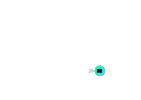

In [32]:
# second argument : position (x_location), (y location)
# Recomendation. Frist use (0,0,...) point 
drawdag(G, [0, 0, 0, 0,0,0,0,0], [0, 0, 0, 0,0,0,0,0])

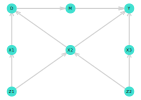

In [41]:
# Locate each varaible's coordinates 

drawdag(G, layout=spring_layout, [-1, 0, -1, 0,1,1,-1,1], [-1, -1, 0, 0,0,-1,1,1])


### 3. Identification via SWIG and D-separation

In [28]:
plant_dag = Dagitty.DAG(:Z1 => :X1, :X1 => :D, :Z1 => :X2, :Z2 => :X3, :X3 => :Yd, :Z2 => :X2, :X2 => :Yd,
    :X2 => :D, :X3 => :Yd, :Md => :Yd, :d => :Md)

DAG: {9, 10} directed simple Int64 graph with labels [:D, :Md, :X1, :X2, :X3, :Yd, :Z1, :Z2, :d])


In [29]:
#drawdag(plant_dag, [0, 0, 0, 0,0,0,0,0,0], [0, 0, 0, 0,0,0,0,0,0])

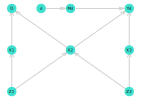

In [30]:
drawdag(plant_dag, layout=spring_layout, [-2, 0, -2, 0,2,2,-2,2,-1], [-1, -1, 0, 0,0,-1,1,1,-1])

### Triangular Model

Counfounder effect

In [16]:
Tri_model = Dagitty.DAG(:D => :Y, :X => :D, :X => :Y)

DAG: {3, 3} directed simple Int64 graph with labels [:D, :X, :Y])


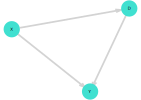

In [12]:
drawdag(Tri_model, layout=spring_layout, [1, -2, 0], [-3, -2, 1])

In [13]:
to_ggm(Tri_model) |> display

LoadError: MethodError: no method matching to_ggm(::Dagitty.DAG)
[0mClosest candidates are:
[0m  to_ggm([91m::OrderedDict[39m; touppercase, order) at C:\Users\Roberto Carlos\.julia\packages\StructuralCausalModels\m90sE\src\utils\ggm_conversions.jl:27
[0m  to_ggm([91m::StructuralCausalModels.DAG[39m; touppercase, order) at C:\Users\Roberto Carlos\.julia\packages\StructuralCausalModels\m90sE\src\utils\ggm_conversions.jl:62

In [14]:
e1 = StructuralCausalModels.edge_matrix(Tri_model)

LoadError: MethodError: no method matching edge_matrix(::Dagitty.DAG)
[0mClosest candidates are:
[0m  edge_matrix([91m::OrderedDict[39m) at C:\Users\Roberto Carlos\.julia\packages\StructuralCausalModels\m90sE\src\methods\dag_methods.jl:43
[0m  edge_matrix([91m::NamedArray[39m) at C:\Users\Roberto Carlos\.julia\packages\StructuralCausalModels\m90sE\src\methods\dag_methods.jl:93
[0m  edge_matrix([91m::NamedArray[39m, [91m::Any[39m) at C:\Users\Roberto Carlos\.julia\packages\StructuralCausalModels\m90sE\src\methods\dag_methods.jl:93

In [142]:
@test !is_d_separated(plant_dag, [:Z1], [:X2], [:X3])

Test Passed
  Expression: !(is_d_separated(plant_dag, [:Z1], [:X2], [:X3]))

In [143]:
using StructuralCausalModels

ProjDir = @__DIR__
cd(ProjDir) #do

d_string = "dag {A -> {E Z}; B -> {D Z}; Z -> {D E}; E -> D}"

dag = Dagitty.DAG("conf_triangles", d_string);

show(dag)

to_ggm(dag) |> display

LoadError: MethodError: [0mCannot `convert` an object of type 
[0m  [92mString[39m[0m to an object of type 
[0m  [91mSimpleDiGraph[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T at C:\Users\Roberto Carlos\AppData\Local\Programs\Julia-1.7.2\share\julia\base\essentials.jl:218

In [140]:
d_string = "dag {A -> {E Z}; B -> {D Z}; Z -> {D E}; E -> D}"


dag = DAG("conf_triangles", d_string);
show(dag)

to_ggm(dag) |> display








#DAG.parents(dag,"A")
#parents(A)
#TikzGraphs.plot(dag)
#show(dag)
#plot_dag(dag)
#DiGraph(nv(dag))
#fig = ancestral_graph(dag)

#display(fig)
#display(Graph(graph2dot(dag)))
#e1 = StructuralCausalModels.edge_matrix(d_string)
#drawdag(dag)

LoadError: UndefVarError: DAG not defined

In [33]:
TikzGraphs.plot(fig)

LoadError: UndefVarError: TikzGraphs not defined

In [121]:
to_ggm(dag) |> display


LoadError: UndefVarError: dag not defined

In [14]:
fname = ProjDir * "/conf_triangles.dot"
a=to_graphviz(dag, fname)
a


In [13]:
d1 =OrderedDict(
  [:u, :w] => :v,
  [:u] => :x,
  :s1 => [:u],
  :w => :y,
  [:s2] => [:w]
)

d1
#DAG = DAG("dd", d1)
#e1 = StructuralCausalModels.edge_matrix(d1)



OrderedDict{Any, Any} with 5 entries:
  [:u, :w] => :v
  [:u]     => :x
  :s1      => [:u]
  :w       => :y
  [:s2]    => [:w]